In [13]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Smokers vs non smokers insurance charges
1. Smokers and non smokers have the same amount of insurance charges.
There is a significant difference between smokers and non smokers insurance charges.
2. This would be a continious nominal data type

In [71]:
#3.
sample = df.sample(n=50,random_state=42)
smoker = sample.loc[ sample['smoker']=='yes', "charges"]
non_smoker = sample.loc[ sample['smoker']=='no',"charges"]

In [72]:
print(f"For smokers(n={len(smoker)}): Mean={np.mean(smoker):.2f}")
print(f"For non smokers(n={len(non_smoker)}): Mean={np.mean(non_smoker):.2f}")

For smokers(n=11): Mean=35439.40
For non smokers(n=39): Mean=7309.48


In [16]:
smoker_outliers = np.abs(stats.zscore(smoker)) > 3
smoker_outliers.sum()


0

In [17]:
non_smoker_outliers = np.abs(stats.zscore(non_smoker)) > 3
non_smoker_outliers.sum()

0

In [18]:
result = stats.normaltest(non_smoker)
result.pvalue

0.26898239167805005

In [19]:
result = stats.normaltest(smoker)
result.pvalue

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


0.331317122245031

In [20]:
result = stats.levene(non_smoker, smoker)
print(result)

LeveneResult(statistic=18.397400827816167, pvalue=8.621214599569032e-05)


In [21]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


In [22]:
result = stats.ttest_ind(smoker, non_smoker, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=8.559207952113589, pvalue=3.4904271993679657e-06)


True

In [23]:
smoker.mean()

35439.39606363636

In [24]:
non_smoker.mean()

7309.480381538463

4. Since we reject the null hyptohesis cause both p-values are greater than alpha(.05) we can come to the conclusion that smokers have a higher insurance charge than non smokers.

ValueError: The palette dictionary is missing keys: {'yes', 'no'}

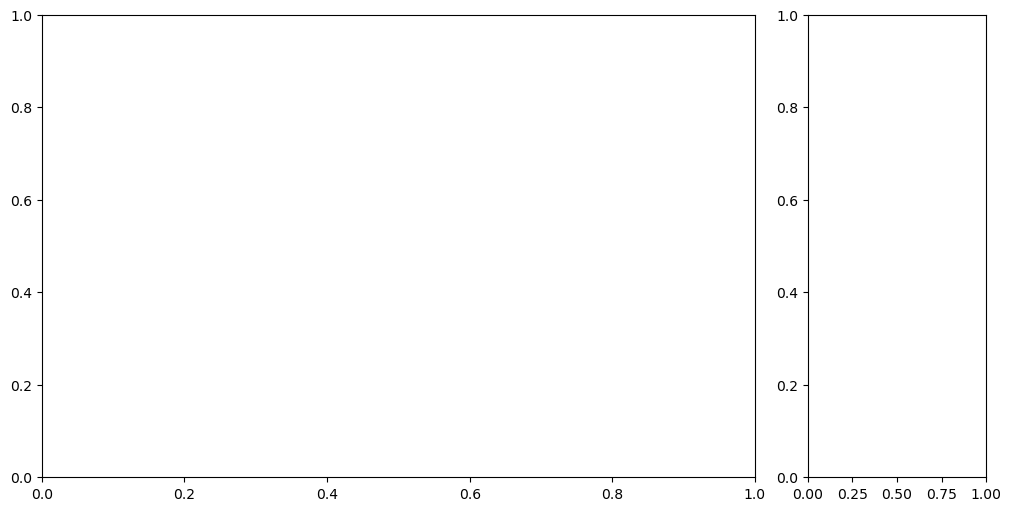

In [42]:
#5.
smoker_palette={'smoker':'dodgerblue', 'non_smoker':'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=sample, x='charges', hue = 'smoker',fill=True,kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(smoker), ls='--',lw=3, 
           label=f"smoker (Mean={np.mean(smoker):.2f})",color=smoker_palette['smoker'])

ax.axvline(np.mean(non_smoker), ls='--', lw=3, 
           label=f"non_smoker (Mean={np.mean(non_smoker):.2f})",color=smoker_palette['non_smoker'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of smoker status by charge',fontsize='xx-large');

1.Null hypothesis: Men and women have equal likelihood of being smokers.Non-null hypothesis: There is a difference between likelihood of men being smokers compared to women being smokers.
2.This would be a discrete categorical data type.


In [49]:
df['smoker']= df['smoker'].replace({'no':0, 'yes':1})

In [50]:
sample = df.sample(n=50,random_state=42)
male_smoker = sample.loc[ sample['sex']=='male', "smoker"]
female_smoker = sample.loc[ sample['sex']=='female',"smoker"]

In [52]:
print(f"For male smokers(n={len(male_smoker)}): Mean={np.mean(male_smoker):.2f}")
print(f"For female smokers(n={len(female_smoker)}): Mean={np.mean(female_smoker):.2f}")

For male smokers(n=23): Mean=0.30
For female smokers(n=27): Mean=0.15


In [53]:
male_outliers = np.abs(stats.zscore(male_smoker)) > 3
male_outliers.sum()


0

In [54]:
female_outliers = np.abs(stats.zscore(female_smoker)) > 3
female_outliers.sum()


0

In [55]:
result = stats.normaltest(male_smoker)
result.pvalue

0.016444010561215573

In [56]:
result = stats.normaltest(female_smoker)
result.pvalue

7.144838400596992e-05

In [57]:
result = stats.levene(male_smoker, female_smoker)
print(result)

LeveneResult(statistic=1.7573229571984437, pvalue=0.19123353816943495)


In [58]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups DO have equal variance.


In [59]:
result = stats.ttest_ind(male_smoker, female_smoker, equal_var=True)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=1.3256405837173377, pvalue=0.19123353816943572)


False

In [60]:
male_smoker.mean()

0.30434782608695654

In [61]:
female_smoker.mean()

0.14814814814814814

4. Since we reject the null hypothesis cause both male and female smoker values are greater than alpha(.05) we can come to the conclusion since the mean of the male smokers is higher than the female we can also conclude that males have a higher chance of being smokers.

ValueError: The palette dictionary is missing keys: {0, 1}

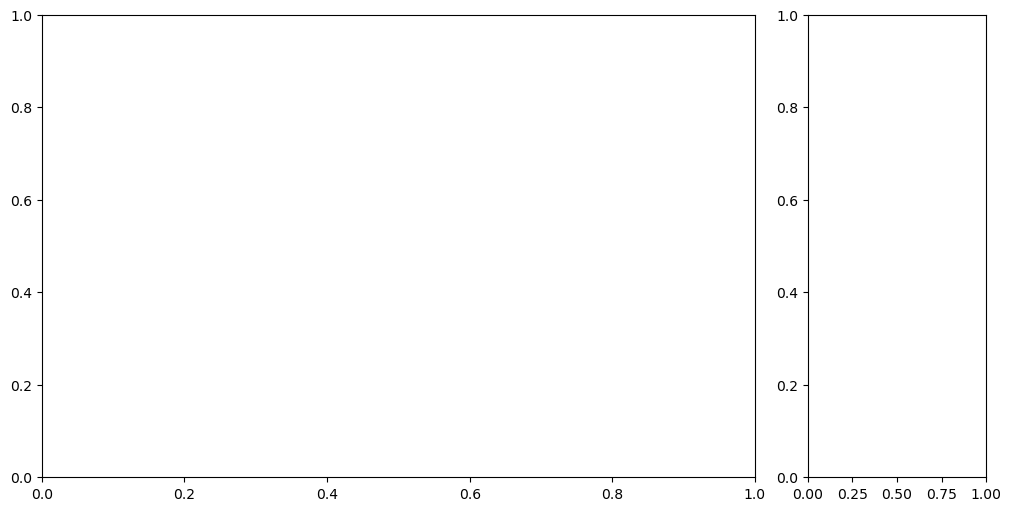

In [62]:
#5.
gender_palette={'male_smoker':'dodgerblue', 'female_smoker':'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=sample, x='sex', hue = 'smoker',fill=True,kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=gender_palette)

ax.axvline(np.mean(male_smoker), ls='--',lw=3, 
           label=f"male_smoker (Mean={np.mean(male_smoker):.2f})",color=gender_palette['male_smoker'])

ax.axvline(np.mean(non_smoker), ls='--', lw=3, 
           label=f"female_smoker (Mean={np.mean(female_smoker):.2f})",color=gender_palette['female_smoker'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='sex',y='smoker',ax = ax_bar,palette=gender_palette)
fig.suptitle('Comparison of smoker status by sex',fontsize='xx-large');

1. Null hypothesis: Different regions do not have different variance of charges. Non-null hypothesis: Different regions do have a variance of charges
2. This is a continous nominal data type

In [64]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [73]:
#3.
sample = df.sample(n=50,random_state=42)
southeast = sample.loc[ sample['region']=='southeast', "charges"]
southwest = sample.loc[ sample['region']=='southwest',"charges"]
northwest = sample.loc[ sample['region']=='northwest',"charges"]
northeast = sample.loc[ sample['region']=='northeast',"charges"]

In [74]:
southeast_outliers = np.abs(stats.zscore(southeast)) > 3
southeast_outliers.sum()

0

In [75]:
southwest_outliers = np.abs(stats.zscore(southwest)) > 3
southwest_outliers.sum()

0

In [76]:
northeast_outliers = np.abs(stats.zscore(northeast)) > 3
northeast_outliers.sum()

0

In [78]:
northwest_outliers = np.abs(stats.zscore(northwest)) > 3
northwest_outliers.sum()

0

In [79]:
result = stats.normaltest(southeast)
result.pvalue

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


0.0010543076130547957

In [80]:
result = stats.normaltest(southwest)
result.pvalue

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


0.4319262137653913

In [81]:
result = stats.normaltest(northeast)
result.pvalue

ValueError: skewtest is not valid with less than 8 samples; 6 samples were given.